<a href="https://colab.research.google.com/github/lailamt/mate34/blob/main/Trabalho_B_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### PyPDF

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 6.2 MB/s 


In [ ]:
import PyPDF2

In [ ]:
from PyPDF2 import PdfReader

reader = PdfReader("/content/drive/MyDrive/Mestrado_UFBA/MATE34_PLN/corpus/helena.pdf")

for number in range(len(reader.pages)):
    page = reader.pages[number]
    text = page.extract_text()
    writer=open(r"/content/drive/MyDrive/Mestrado_UFBA/MATE34_PLN/corpus/helena.txt","a")
    writer.writelines(text)

#####Pips

In [2]:
!pip install transformers==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 884 kB 7.7 MB/s 
     |████████████████████████████████| 3.0 MB 43.3 MB/s 
     |████████████████████████████████| 1.3 MB 80.9 MB/s 
     |████████████████████████████████| 880 kB 58.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=99dd6182d0fe41fd7064192178cd52cbb30b5c7c195ce18b8002f250c8c599e8
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses


In [3]:
!pip install -U spacy
!python -m spacy download pt_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-14 13:07:43.012565: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 568.2 MB 14 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


##### Imports

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import re

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import string
import random
import requests
from io import BytesIO
import glob

import gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
# att_stopwords = ['não', 'tal', 'tão', 'à', 'á']

stopwords = nltk.corpus.stopwords.words('portuguese')
# stopwords = stopwords + att_stopwords
# stopwords

##### Paths

In [ ]:
path_cbow_s100 = '/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/models/cbow_s100.txt'

In [32]:
path_corpus = '/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/corpus/corpus_discursos_presidenciais_brasil/'

##### Arquivo e preprocessamento

In [33]:
filename = path_corpus

In [34]:
fileids = glob.glob(path_corpus + '*.txt')
print(fileids)

['/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/corpus/corpus_discursos_presidenciais_brasil/1891.txt', '/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/corpus/corpus_discursos_presidenciais_brasil/1894.txt', '/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/corpus/corpus_discursos_presidenciais_brasil/1889.txt', '/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/corpus/corpus_discursos_presidenciais_brasil/1898.txt', '/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/corpus/corpus_discursos_presidenciais_brasil/1906.txt', '/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/corpus/corpus_discursos_presidenciais_brasil/1910.txt', '/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/corpus/corpus_discursos_presidenciais_brasil/1902.txt', '/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/corpus/corpus_discursos_presidenciais_brasil/1922.txt', '/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/corpus/corpus_discursos_presidenciais_brasil/1919.txt', '/content/drive/MyDrive/Mestrado_UFBA/MATE_PLN/corpus/corpus_discursos_p

In [35]:
df = pd.DataFrame(columns=['Ano','Discurso'])
for fileid in fileids:
    ano = re.search('\d+', fileid).group(0)
    # print(ano)
    with open(fileid, encoding = 'utf-8') as document:
        # print(document)
        new_row = {'Ano':ano, 'Discurso':document.readlines()[0]}
        df = df.append(new_row, ignore_index=True)

In [36]:
df.head()

,Ano,Discurso
0,1891,Tendo assumido o governo do Estado nos termos ...
1,1894,"Assumindo hoje a Presidência da República, obe..."
2,1889,"Concidadãos – O povo, o exército e a armada na..."
3,1898,"Ao assumir o governo da República, cheio de c..."
4,1906,Ao Assumir a Suprema Magistratura da Republica...


In [37]:
def clean_text(text):
  
    # seleciona apenas letras e coloca todas em minúsculo 
    letras_min = text.lower()

    # remove stopwords
    sem_stopwords = [w for w in word_tokenize(letras_min) if w not in stopwords]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

In [38]:
df['Discurso'] = df['Discurso'].apply(clean_text)

In [39]:
df.head()

,Ano,Discurso
0,1891,tendo assumido governo estado termos constitui...
1,1894,"assumindo hoje presidência república , obedeço..."
2,1889,"concidadãos – povo , exército armada nacional ..."
3,1898,"assumir governo república , cheio confiança po..."
4,1906,"assumir suprema magistratura republica , perío..."


In [40]:
df = df.sort_values(by=['Ano'])

In [41]:
discursos = df['Discurso']
discursos = discursos.to_list()
# print(discursos)
anos = df['Ano']
anos = anos.to_list()
# print(anos)

In [88]:
# for e in range(len(anos)):
#     print(f'Index: {e}, Ano: {anos[e]}')

In [89]:
# word_tokens = [''.join(c for c in s if c not in string.punctuation) for s in word_tokens]
# word_tokens = [s for s in word_tokens if s]

In [44]:
# discursos_tokens = []
# for discurso in discursos:

#     tmp = word_tokenize(discurso)
#     tmp = [''.join(c for c in s if c not in string.punctuation) for s in tmp]
#     tmp = [s for s in tmp if s]
#     # print(tmp)

#     discursos_tokens.append(tmp)

In [45]:
# discursos_sents = []
# for discurso in discursos:
#     sents = sent_tokenize(discurso)

#     aux = []
#     for sent in sents:
#         tmp = word_tokenize(sent)
#         tmp = [''.join(c for c in s if c not in string.punctuation) for s in tmp]
#         tmp = [s for s in tmp if s]
#         # print(tmp)
#         aux.append(tmp)

#     discursos_sents.append(aux)

In [90]:
punct = string.punctuation + '–' + '``'

In [91]:
discursos_tokens = []
discursos_sents = []
for discurso in discursos:

    tmp = word_tokenize(discurso)
    tmp = [''.join(c for c in s if c not in punct) for s in tmp]
    tmp = [s for s in tmp if s]
    # print(tmp)
    discursos_tokens.append(tmp)

    sents = sent_tokenize(discurso)
    
    aux = []
    for sent in sents:
        tmp = word_tokenize(sent)
        tmp = [''.join(c for c in s if c not in string.punctuation) for s in tmp]
        tmp = [s for s in tmp if s]
        # print(tmp)
        aux.append(tmp)

    discursos_sents.append(aux)

In [48]:
print(discursos_tokens[0])

['concidadãos', 'povo', 'exército', 'armada', 'nacional', 'perfeita', 'comunhão', 'sentimentos', 'concidadãos', 'residentes', 'províncias', 'acabam', 'decretar', 'deposição', 'dinastia', 'imperial', 'conseqüentemente', 'extinção', 'sistema', 'monárquico', 'representativo', 'resultado', 'imediato', 'desta', 'revolução', 'nacional', 'caráter', 'essencialmente', 'patriótico', 'acaba', 'instituído', 'governo', 'provisório', 'cuja', 'principal', 'missão', 'garantir', 'ordem', 'pública', 'liberdade', 'direitos', 'cidadãos', 'comporem', 'governo', 'enquanto', 'nação', 'soberana', 'órgãos', 'competentes', 'proceder', 'escolha', 'governo', 'definitivo', 'nomeados', 'chefe', 'poder', 'executivo', 'nação', 'cidadãos', 'abaixo', 'assinados', 'concidadãos', 'governo', 'provisório', 'simples', 'agente', 'temporário', 'soberania', 'nacional', 'governo', 'paz', 'liberdade', 'fraternidade', 'ordem', 'uso', 'atribuições', 'faculdades', 'extraordinárias', 'acha', 'investido', 'defesa', 'integridade', 'pá

In [49]:
for e in discursos_sents[0]:
    print(e)

['concidadãos', '–', 'povo', 'exército', 'armada', 'nacional', 'perfeita', 'comunhão', 'sentimentos', 'concidadãos', 'residentes', 'províncias', 'acabam', 'decretar', 'deposição', 'dinastia', 'imperial', 'conseqüentemente', 'extinção', 'sistema', 'monárquico', 'representativo']
['resultado', 'imediato', 'desta', 'revolução', 'nacional', 'caráter', 'essencialmente', 'patriótico', 'acaba', 'instituído', 'governo', 'provisório', 'cuja', 'principal', 'missão', 'garantir', 'ordem', 'pública', 'liberdade', 'direitos', 'cidadãos']
['comporem', 'governo', 'enquanto', 'nação', 'soberana', 'órgãos', 'competentes', 'proceder', 'escolha', 'governo', 'definitivo', 'nomeados', 'chefe', 'poder', 'executivo', 'nação', 'cidadãos', 'abaixo', 'assinados']
['concidadãos', '–', 'governo', 'provisório', 'simples', 'agente', 'temporário', 'soberania', 'nacional', 'governo', 'paz', 'liberdade', 'fraternidade', 'ordem']
['uso', 'atribuições', 'faculdades', 'extraordinárias', 'acha', 'investido', 'defesa', 'int

In [50]:
for sent in discursos_tokens:
    fd = FreqDist([w for w in sent])
    print(f'Ano {anos[discursos_tokens.index(sent)]}')
    for i in range(0,10):
        print(fd.most_common()[i])

Ano 1889
('governo', 8)
('concidadãos', 5)
('nacional', 4)
('provisório', 4)
('ordem', 3)
('pública', 3)
('direitos', 3)
('todos', 3)
('bem', 3)
('povo', 2)
Ano 1891
('estado', 7)
('nacional', 7)
('país', 5)
('lei', 5)
('governo', 4)
('deste', 4)
('mês', 4)
('pensamento', 4)
('trabalho', 4)
('povo', 4)
Ano 1894
('á', 10)
('nacional', 10)
('republica', 8)
('regime', 6)
('ordem', 6)
('pátria', 5)
('paz', 5)
('situação', 4)
('vida', 4)
('nação', 4)
Ano 1898
('nacional', 19)
('república', 14)
('política', 14)
('todos', 13)
('país', 12)
('governo', 11)
('poder', 11)
('interesses', 10)
('financeira', 10)
('responsabilidade', 9)
Ano 1902
('república', 13)
('país', 11)
('governo', 9)
('todos', 8)
('poderes', 8)
('trabalho', 7)
('grandes', 6)
('todas', 6)
('regime', 6)
('maior', 6)
Ano 1906
('todos', 12)
('nacional', 11)
('moeda', 11)
('bem', 10)
('grande', 10)
('estados', 10)
('progresso', 10)
('povo', 9)
('câmbio', 9)
('tão', 9)
Ano 1910
('país', 15)
('ensino', 12)
('regime', 8)
('nação', 8)


##### Plots

Ano 1889


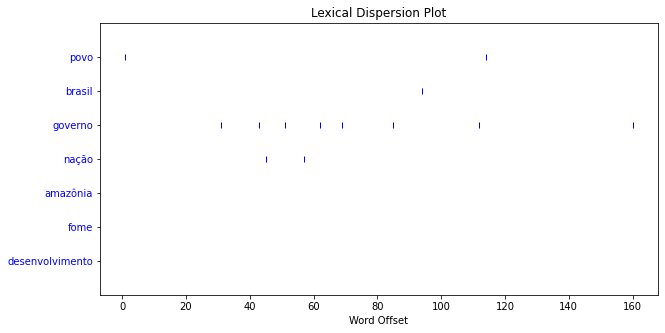

Ano 1891


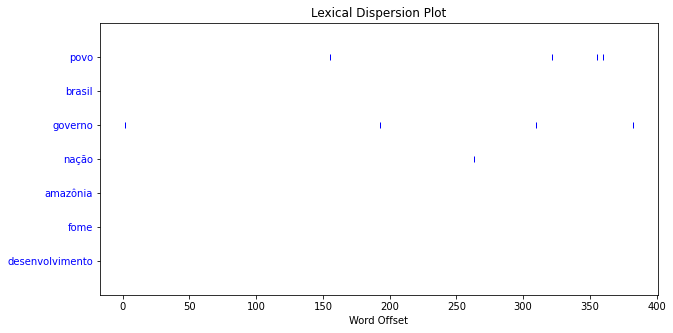

Ano 1894


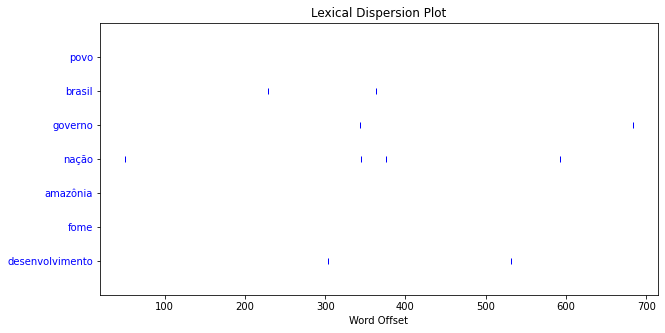

Ano 1898


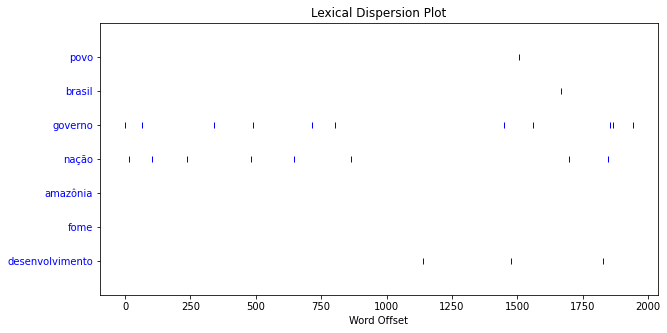

Ano 1902


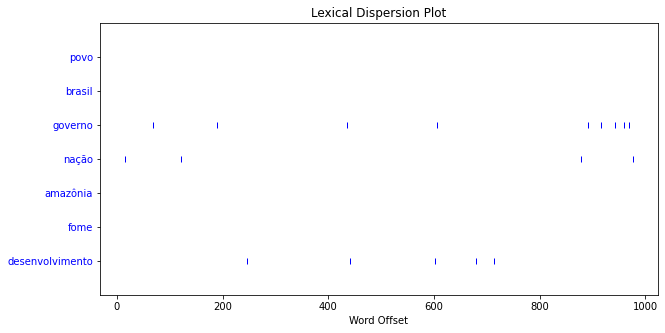

Ano 1906


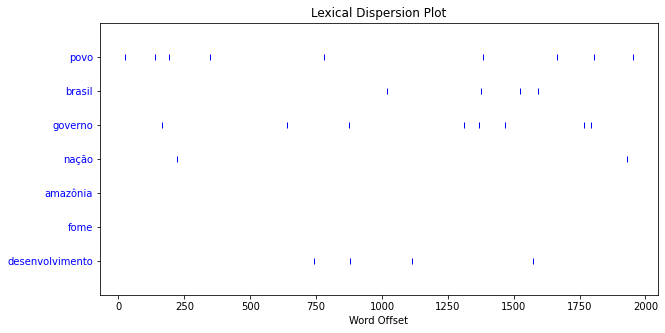

Ano 1910


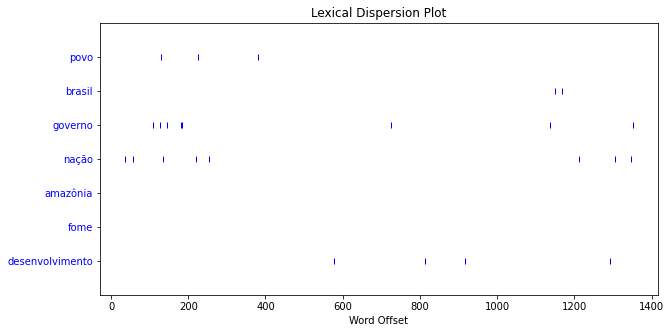

Ano 1914


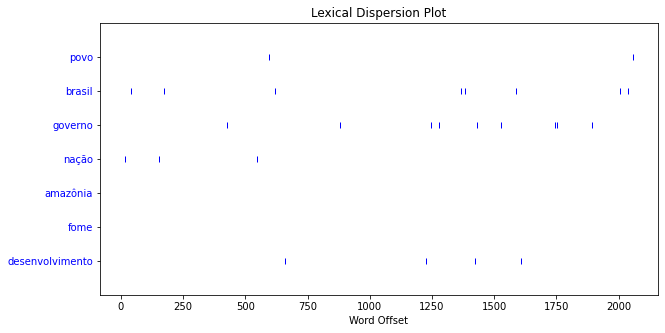

Ano 1919


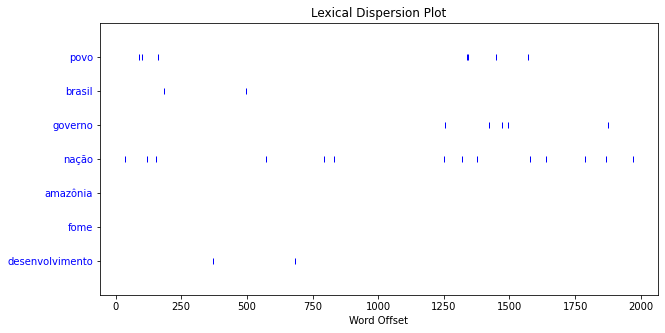

Ano 1922


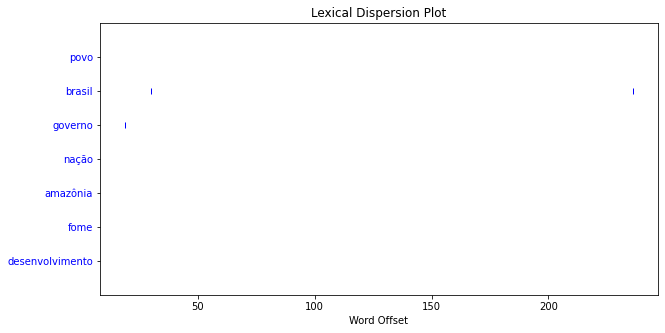

Ano 1926


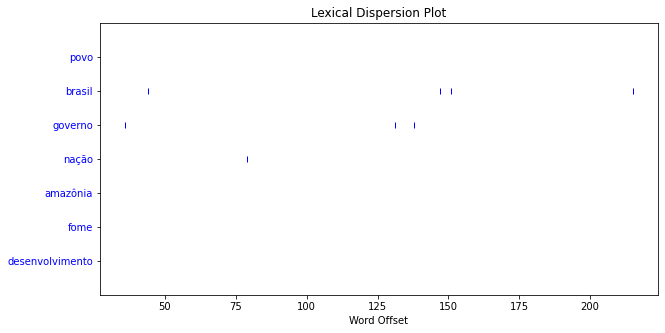

Ano 1930


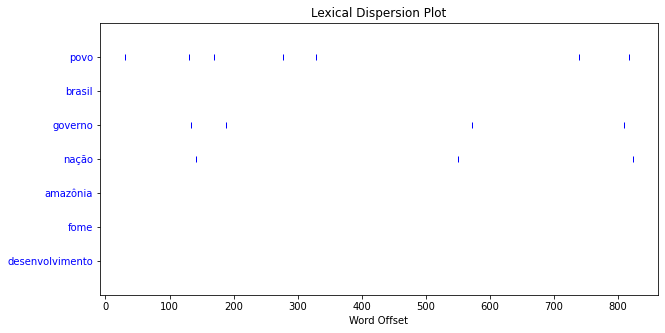

Ano 1934


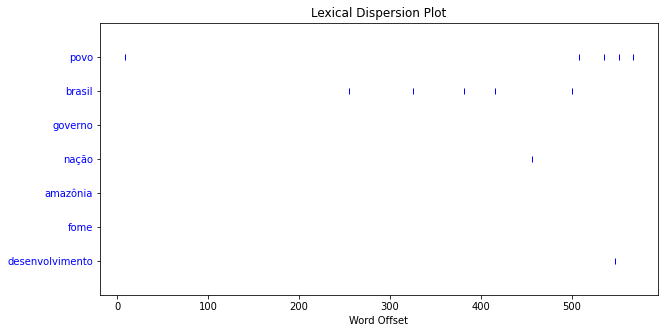

Ano 1937


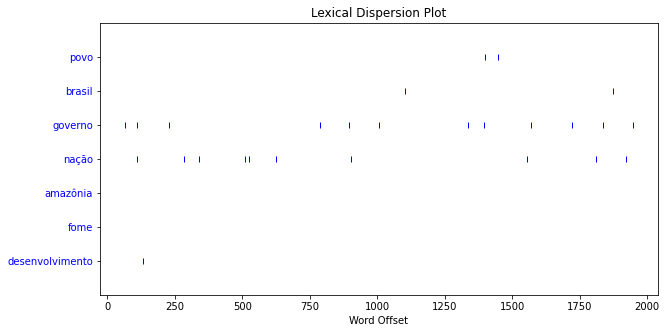

Ano 1946


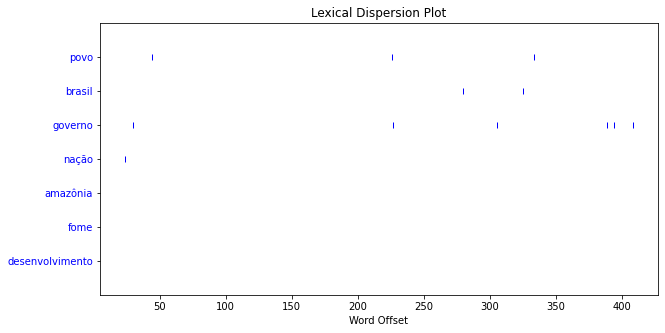

Ano 1951


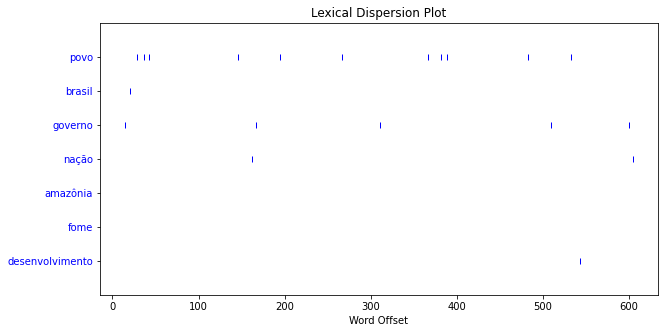

Ano 1956


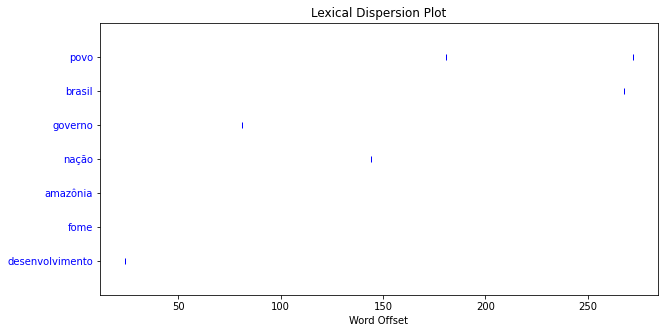

Ano 1961


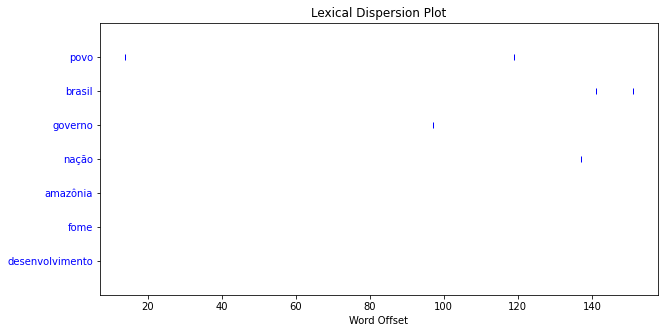

Ano 1961


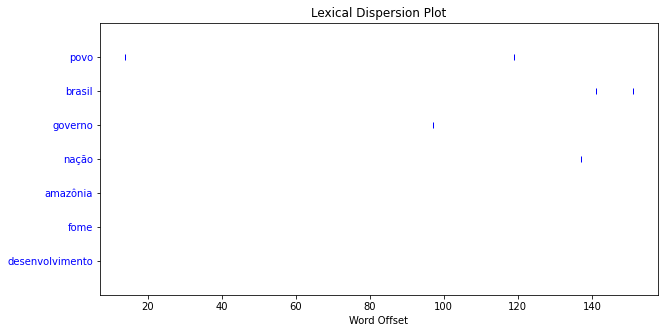

Ano 1964


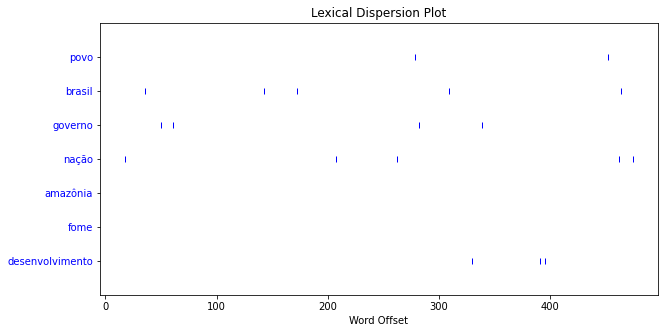

Ano 1967


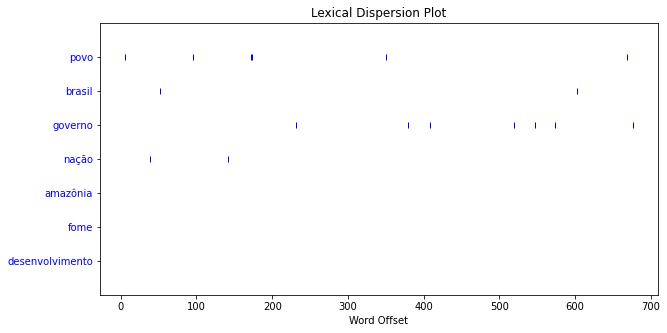

Ano 1969


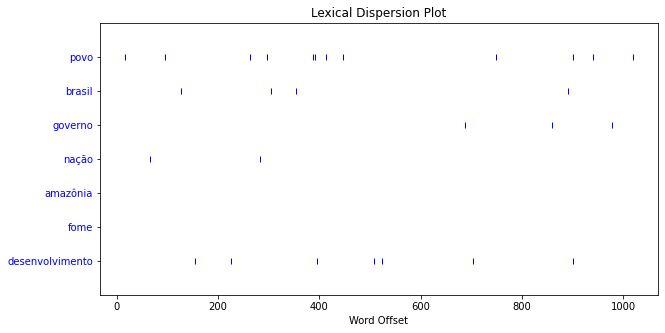

Ano 1974


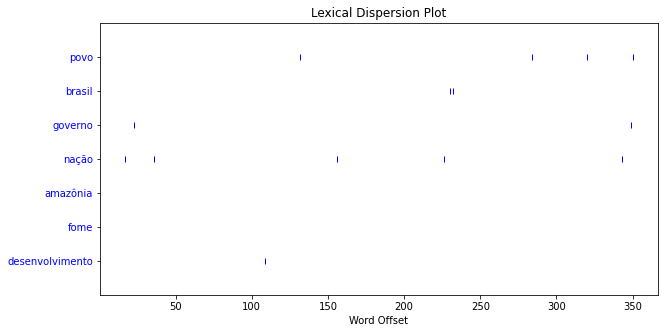

Ano 1979


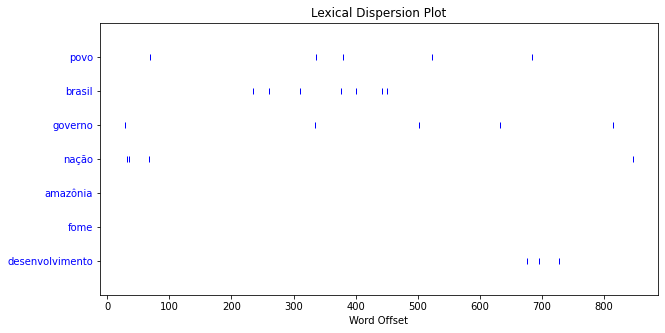

Ano 1985


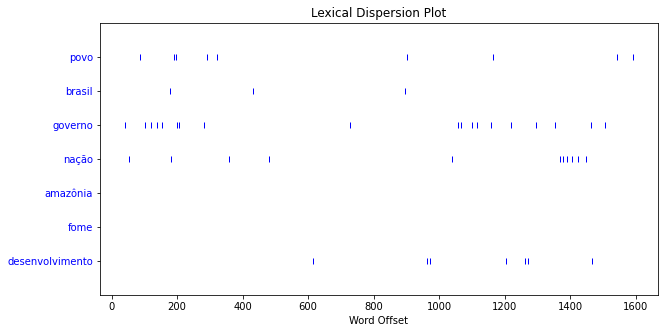

Ano 1990


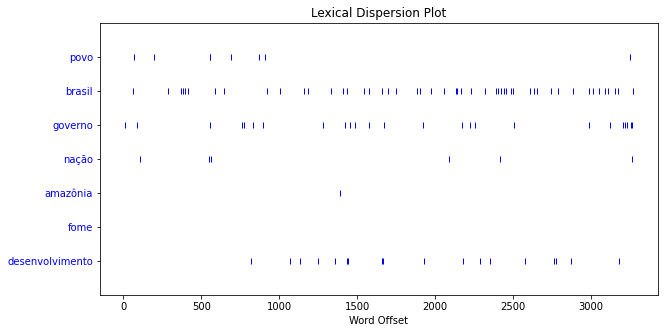

Ano 1992


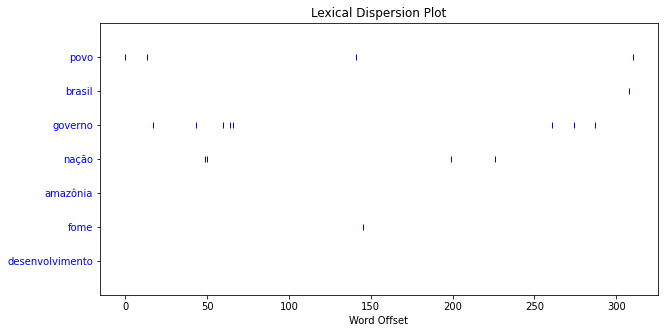

Ano 1994


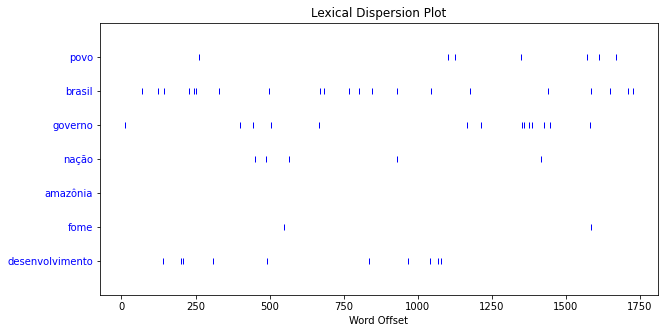

Ano 1999


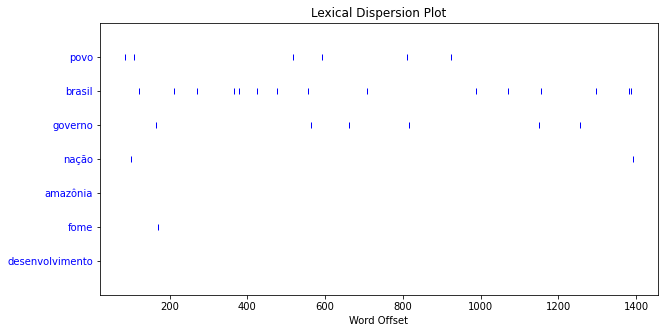

Ano 2003


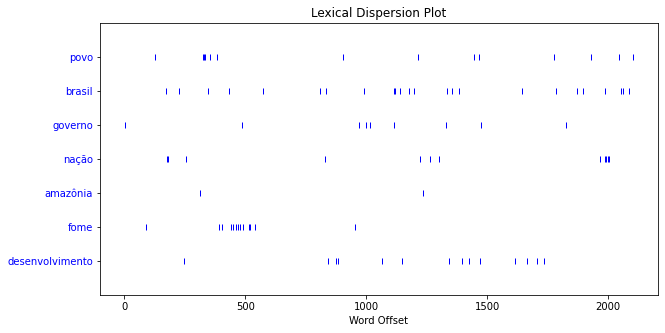

Ano 2007


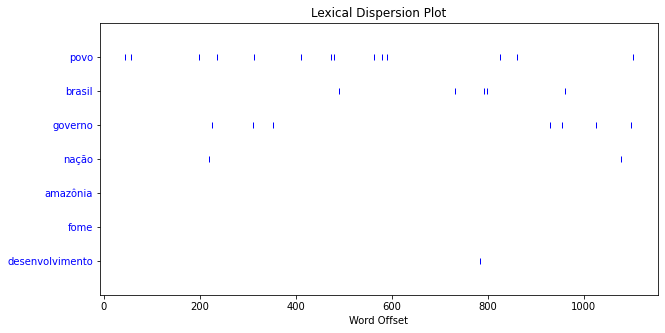

Ano 2011


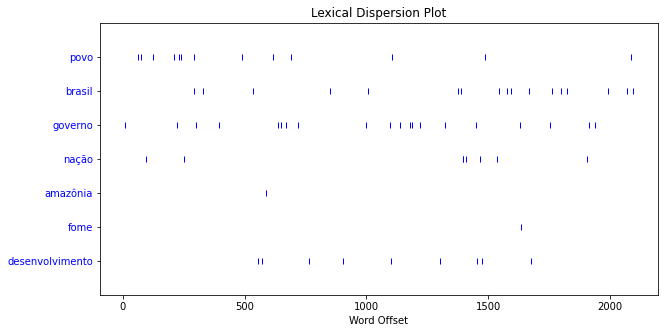

Ano 2015


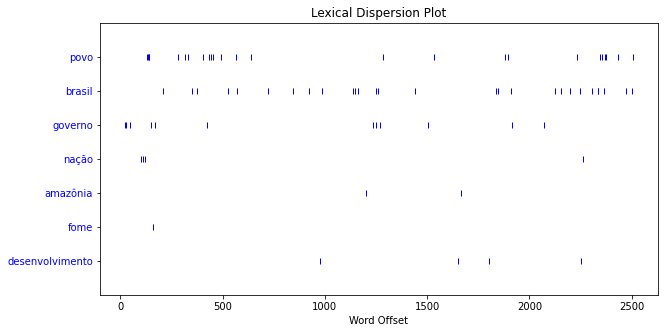

Ano 2016


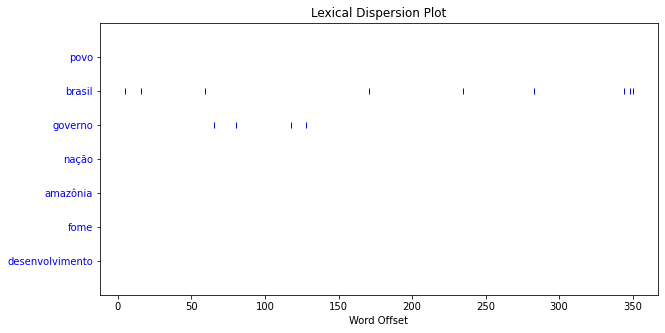

Ano 2019


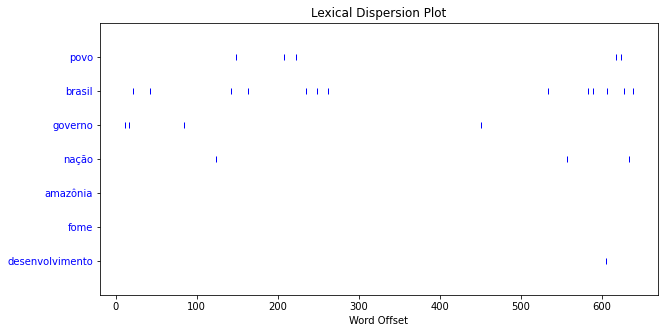

In [51]:
for ano in anos:
    print(f'Ano {ano}')
    plt.figure(figsize=(10, 5))
    sent = nltk.Text(discursos_tokens[anos.index(ano)])
    # fd.plot(30, title = "Frequência de Palavras")
    sent.dispersion_plot(['povo', 'brasil', 'governo', 'nação', 'amazônia', 'fome', 'desenvolvimento'])
    # print(discursos[anos.index(ano)])

##### Word2Vec

In [107]:
primeira_republica = sum(discursos_sents[:10], [])
gov_provisorio = sum(discursos_sents[11:13], [])
quarta_republica = sum(discursos_sents[14:18], [])
ditadura = sum(discursos_sents[19:23], [])
nova_republica = sum(discursos_sents[24:], [])

In [101]:
# Slices
def get_most_similar_slice_to(token, slice_gov):
    model = gensim.models.Word2Vec(slice_gov, size=100, window=20, min_count=2, workers=10, iter=5)

    # print(anos[discursos_sents.index(discurso)])

    if token in model.wv.vocab:
        print(model.wv.most_similar(positive=[token], topn=5))
    else:
        print(f'Palavra {token} não é mencionada em nenhum discurso do período')

In [96]:
get_most_similar_slice_to('governo', primeira_republica)

[('–', 0.9464592337608337), ('interesses', 0.9408596754074097), ('todas', 0.9370982646942139), ('nacional', 0.9359921216964722), ('todos', 0.9354090690612793)]


In [97]:
get_most_similar_slice_to('governo', gov_provisorio)

[('caráter', 0.2593446969985962), ('sul', 0.25022363662719727), ('instrução', 0.23660919070243835), ('todo', 0.2285880595445633), ('indispensável', 0.22357600927352905)]


In [98]:
get_most_similar_slice_to('governo', quarta_republica)

[('espero', 0.2827877104282379), ('presidente', 0.27167606353759766), ('sempre', 0.2501886487007141), ('indispensável', 0.23179298639297485), ('hoje', 0.2311112880706787)]


In [99]:
get_most_similar_slice_to('governo', ditadura)

[('realmente', 0.2953493595123291), ('espero', 0.29313910007476807), ('presidente', 0.28500041365623474), ('lealdade', 0.2816392481327057), ('jurídica', 0.27705496549606323)]


In [100]:
get_most_similar_slice_to('governo', nova_republica)

[('nacional', 0.9854648113250732), ('presidente', 0.9849847555160522), ('brasil', 0.9846385717391968), ('senhores', 0.9841189384460449), ('país', 0.9840787649154663)]


In [57]:
# Ano a ano
def get_most_similar_to(token):
    for discurso in discursos_sents:
        model = gensim.models.Word2Vec(discurso, size=100, window=20, min_count=2, workers=10, iter=5)

        print(anos[discursos_sents.index(discurso)])

        if token in model.wv.vocab:
            print(model.wv.most_similar(positive=[token], topn=5))
        else:
            print(f'Palavra {token} não é mencionada no discurso')

In [58]:
get_most_similar_to('governo')

1889
[('nacionais', 0.21517989039421082), ('cidadãos', 0.20472639799118042), ('bem', 0.1037646234035492), ('fica', 0.09216088801622391), ('nacional', 0.09195949137210846)]
1891
[('espero', 0.271516352891922), ('todo', 0.227472186088562), ('administração', 0.1983502209186554), ('levantar', 0.16930507123470306), ('nulo', 0.16515210270881653)]
1894
[('hoje', 0.22829481959342957), ('particular', 0.218155175447464), ('unânime', 0.19762900471687317), ('período', 0.16785050928592682), ('valor', 0.14546309411525726)]


1898
[('vastos', 0.31154876947402954), ('caráter', 0.26145485043525696), ('lealdade', 0.2562757730484009), ('elevado', 0.25044262409210205), ('dada', 0.25011488795280457)]
1902
[('puderem', 0.267856240272522), ('sempre', 0.24916863441467285), ('hoje', 0.23754626512527466), ('interesses', 0.19262589514255524), ('classe', 0.184269979596138)]


1906
[('primeira', 0.3142338991165161), ('espero', 0.2754497528076172), ('caráter', 0.26281142234802246), ('principal', 0.2601901590824127), ('experiência', 0.2588191032409668)]
1910
[('sempre', 0.2501794695854187), ('instrução', 0.2354983538389206), ('hoje', 0.23448532819747925), ('todo', 0.23302727937698364), ('fácil', 0.229148730635643)]


1914
[('caráter', 0.26657819747924805), ('instrução', 0.24509555101394653), ('sempre', 0.24490873515605927), ('necessárias', 0.23698337376117706), ('hoje', 0.2322341948747635)]
1919
[('presidente', 0.26706188917160034), ('projetos', 0.25680509209632874), ('sempre', 0.23949338495731354), ('hoje', 0.23388534784317017), ('particular', 0.2260759174823761)]


1922
Palavra governo não é mencionada no discurso
1926
[('presidente', 0.2588731646537781), ('excelência', 0.19851481914520264), ('respondeu', 0.19183099269866943), ('expressões', 0.1434648334980011), ('receber', 0.13929016888141632)]
1930
[('sul', 0.2457605004310608), ('todo', 0.22706034779548645), ('indispensável', 0.22271917760372162), ('colaboração', 0.15838907659053802), ('públicas', 0.15529990196228027)]
1934
Palavra governo não é mencionada no discurso


1937
[('caráter', 0.2663068473339081), ('sempre', 0.2518334984779358), ('expressão', 0.24871721863746643), ('hoje', 0.24128611385822296), ('todo', 0.23693981766700745)]
1946
[('espero', 0.27388638257980347), ('presidente', 0.2588873505592346), ('indispensável', 0.22321730852127075), ('solidariedade', 0.21589739620685577), ('cooperação', 0.16865409910678864)]
1951
[('quero', 0.21812275052070618), ('provocações', 0.19996029138565063), ('interesses', 0.18923918902873993), ('cooperação', 0.16691626608371735), ('mim', 0.1237197294831276)]
1956
Palavra governo não é mencionada no discurso
1961


Palavra governo não é mencionada no discurso
1961
[('presidente', 0.25975942611694336), ('todo', 0.228355273604393), ('solidariedade', 0.2224102020263672), ('interesses', 0.19367356598377228), ('prolongadas', 0.174492746591568)]
1964
[('lealdade', 0.25772830843925476), ('independência', 0.1322159767150879), ('defenderei', 0.13143175840377808), ('honra', 0.12942145764827728), ('mim', 0.12327657639980316)]
1967
[('espero', 0.2726903259754181), ('presidente', 0.2581016421318054), ('solidariedade', 0.21611499786376953), ('unânime', 0.19805797934532166), ('institucional', 0.18331725895404816)]


1969
[('jurídica', 0.2837713360786438), ('espero', 0.27400264143943787), ('sempre', 0.2474900484085083), ('municipais', 0.24440529942512512), ('indispensável', 0.22704201936721802)]
1974
[('realmente', 0.2637593150138855), ('sempre', 0.24501609802246094), ('dignificante', 0.16821518540382385), ('v', 0.15637347102165222), ('bem', 0.1016770675778389)]
1979
[('presidente', 0.2591806948184967), ('hoje', 0.2296130210161209), ('excelência', 0.19795101881027222), ('chaves', 0.180496484041214), ('reafirmo', 0.1686287522315979)]


1985
[('primeira', 0.3136219382286072), ('presidente', 0.26916491985321045), ('sempre', 0.25138193368911743), ('hoje', 0.2393018901348114), ('todo', 0.2367904782295227)]


1990
[('justamente', 0.33201780915260315), ('lutar', 0.30459102988243103), ('presidente', 0.3014258146286011), ('espero', 0.2951909005641937), ('sul', 0.28074023127555847)]
1992
[('medo', 0.24560797214508057), ('brasileiro', 0.10087995231151581), ('contra', 0.08812317252159119), ('consciência', 0.08142291009426117), ('deve', 0.06811671704053879)]
1994
[('presidente', 0.2735825479030609), ('puderem', 0.2691996991634369), ('sempre', 0.24071520566940308), ('hoje', 0.2364479899406433), ('necessárias', 0.233183354139328)]


1999
[('presidente', 0.26053887605667114), ('sempre', 0.24839498102664948), ('pôde', 0.23749953508377075), ('hoje', 0.22900347411632538), ('necessárias', 0.22821053862571716)]
2003
[('presidente', 0.26447948813438416), ('medo', 0.25194573402404785), ('sempre', 0.24828189611434937), ('sul', 0.24521520733833313), ('significado', 0.24067136645317078)]


2007
[('presidente', 0.2770261764526367), ('sempre', 0.2517578601837158), ('hoje', 0.24900636076927185), ('nacionais', 0.24333259463310242), ('quero', 0.22792452573776245)]
2011
[('primeira', 0.2997923791408539), ('presidente', 0.2789900302886963), ('experiência', 0.27407655119895935), ('desenvolvido', 0.25804460048675537), ('sempre', 0.243203267455101)]


2015
[('presidente', 0.3014116883277893), ('lutar', 0.29900065064430237), ('medo', 0.27759432792663574), ('projetos', 0.2706223130226135), ('desenvolvido', 0.2702367305755615)]
2016
[('jurídica', 0.28578245639801025), ('todo', 0.22650626301765442), ('interesses', 0.18891212344169617), ('bilhões', 0.17686982452869415), ('programas', 0.16815531253814697)]
2019
[('presidente', 0.25942325592041016), ('hoje', 0.22892069816589355), ('oportunidade', 0.21987326443195343), ('econômica', 0.21909312903881073), ('setor', 0.13727296888828278)]


In [59]:
get_most_similar_to('povo')

1889
[('bem', 0.11369302868843079), ('concidadãos', 0.10126608610153198), ('direitos', 0.09019257873296738), ('nacional', 0.08980616927146912), ('pública', 0.0698007196187973)]
1891
[('livres', 0.2965334355831146), ('garantias', 0.17960429191589355), ('marinha', 0.16892309486865997), ('obediência', 0.1589103639125824), ('brasileiros', 0.1478283405303955)]
1894
Palavra povo não é mencionada no discurso


1898
Palavra povo não é mencionada no discurso
1902
Palavra povo não é mencionada no discurso
1906
[('presidencial', 0.30290594696998596), ('propósito', 0.2914438843727112), ('nova', 0.2534111738204956), ('sempre', 0.24267137050628662), ('valor', 0.23970626294612885)]


1910
[('propósito', 0.275907963514328), ('manifesto', 0.2700597047805786), ('sempre', 0.24145865440368652), ('cumprir', 0.23733554780483246), ('outros', 0.22207103669643402)]
1914
[('laços', 0.2616836130619049), ('sempre', 0.23586487770080566), ('vagabundagem', 0.23583394289016724), ('outros', 0.22719134390354156), ('chefes', 0.22095264494419098)]


1919
[('distribuição', 0.26341137290000916), ('sempre', 0.23665781319141388), ('valor', 0.2260546088218689), ('outros', 0.220686137676239), ('quanto', 0.2074657678604126)]
1922
Palavra povo não é mencionada no discurso
1926
Palavra povo não é mencionada no discurso
1930
[('maior', 0.17437803745269775), ('realidade', 0.15987528860569), ('política', 0.1390470564365387), ('popular', 0.13557842373847961), ('reconstrução', 0.12189291417598724)]
1934
[('homem', 0.19449229538440704), ('voto', 0.18499715626239777), ('homens', 0.18456615507602692), ('zonas', 0.16930881142616272), ('dentro', 0.16779255867004395)]


1937
[('presidencial', 0.30245307087898254), ('sempre', 0.23878780007362366), ('outros', 0.22170019149780273), ('princípios', 0.20131203532218933), ('qualquer', 0.2009517401456833)]
1946
[('quanto', 0.20129483938217163), ('garantias', 0.17894712090492249), ('comum', 0.13828936219215393), ('continuidade', 0.13717401027679443), ('desde', 0.13702493906021118)]
1951
[('provocações', 0.21933037042617798), ('brasileiros', 0.1472543478012085), ('coletivo', 0.13783077895641327), ('política', 0.13773183524608612), ('popular', 0.1343083381652832)]
1956
[('terrível', 0.20800375938415527), ('quanto', 0.201963409781456), ('homens', 0.18502356112003326), ('agora', 0.18221063911914825), ('desejo', 0.174516499042511)]
1961
[('voto', 0.1847822666168213), ('obediência', 0.15860727429389954), ('política', 0.1373331993818283), ('conquista', 0.11903339624404907), ('história', 0.11783754825592041)]


1961
[('quanto', 0.2028784602880478), ('energia', 0.1814614087343216), ('agora', 0.18115156888961792), ('desejo', 0.17399805784225464), ('interna', 0.16287823021411896)]
1964
[('livres', 0.2973097562789917), ('quanto', 0.20224756002426147), ('homem', 0.19507136940956116), ('concórdia', 0.1917780339717865), ('maior', 0.17537787556648254)]
1967
[('chefes', 0.21819740533828735), ('homem', 0.19501850008964539), ('dificuldades', 0.18467648327350616), ('substituir', 0.16013744473457336), ('curso', 0.14033058285713196)]
1969
[('sempre', 0.242438405752182), ('aceito', 0.23471179604530334), ('ajuda', 0.23178735375404358), ('outros', 0.22342008352279663), ('darei', 0.2180115282535553)]


1974
[('sempre', 0.2388419508934021), ('ainda', 0.16953985393047333), ('criador', 0.15302032232284546), ('cada', 0.15083271265029907), ('brasileiros', 0.1472819447517395)]
1979
[('propósito', 0.27806806564331055), ('laços', 0.2566038966178894), ('outros', 0.21993175148963928), ('quanto', 0.20276005566120148), ('desejo', 0.17595143616199493)]


1985
[('distribuição', 0.2606094479560852), ('nova', 0.24527516961097717), ('sempre', 0.24123209714889526), ('quanto', 0.20294207334518433), ('qualquer', 0.20163410902023315)]


1990
[('propósito', 0.29681769013404846), ('laços', 0.2562909424304962), ('conviver', 0.2501785159111023), ('nova', 0.24694250524044037), ('sempre', 0.24027720093727112)]
1992
[('modernidade', 0.18587979674339294), ('cada', 0.15108567476272583), ('comum', 0.1390080749988556), ('valores', 0.11567061394453049), ('vida', 0.10331957042217255)]
1994
[('dá', 0.2723081707954407), ('sempre', 0.23766812682151794), ('pósguerra', 0.23113326728343964), ('outros', 0.22051700949668884), ('cobrar', 0.22033625841140747)]


1999
[('distribuição', 0.2601613998413086), ('sempre', 0.2439521700143814), ('nova', 0.2428995668888092), ('cumprir', 0.23949673771858215), ('outros', 0.22093936800956726)]
2003
[('laços', 0.26256799697875977), ('outros', 0.23660987615585327), ('sempre', 0.2355775237083435), ('chefes', 0.22874528169631958), ('quanto', 0.21286641061306)]


2007
[('tratada', 0.28218144178390503), ('distribuição', 0.27077895402908325), ('ouvindo', 0.2569166123867035), ('sempre', 0.24634717404842377), ('quantidade', 0.24264249205589294)]
2011
[('avançar', 0.31225860118865967), ('presidencial', 0.3072908818721771), ('dá', 0.2741715908050537), ('reservas', 0.24855102598667145), ('sempre', 0.2412479966878891)]


2015
[('avançar', 0.31569236516952515), ('militante', 0.29632699489593506), ('reservas', 0.26492398977279663), ('nova', 0.2598426342010498), ('sempre', 0.256415456533432)]
2016
Palavra povo não é mencionada no discurso
2019
[('respeitados', 0.2449919730424881), ('proteger', 0.24138213694095612), ('chefes', 0.21951788663864136), ('hoje', 0.16525185108184814), ('cada', 0.1513902246952057)]


In [60]:
get_most_similar_to('mulher')

1889
Palavra mulher não é mencionada no discurso
1891
Palavra mulher não é mencionada no discurso
1894
Palavra mulher não é mencionada no discurso
1898
Palavra mulher não é mencionada no discurso


1902
Palavra mulher não é mencionada no discurso
1906
Palavra mulher não é mencionada no discurso
1910
Palavra mulher não é mencionada no discurso


1914
Palavra mulher não é mencionada no discurso
1919
Palavra mulher não é mencionada no discurso
1922
Palavra mulher não é mencionada no discurso
1926
Palavra mulher não é mencionada no discurso


1930
Palavra mulher não é mencionada no discurso
1934
Palavra mulher não é mencionada no discurso
1937
Palavra mulher não é mencionada no discurso
1946
Palavra mulher não é mencionada no discurso


1951
Palavra mulher não é mencionada no discurso
1956
Palavra mulher não é mencionada no discurso
1961
Palavra mulher não é mencionada no discurso
1961
Palavra mulher não é mencionada no discurso
1964
Palavra mulher não é mencionada no discurso
1967
Palavra mulher não é mencionada no discurso


1969
Palavra mulher não é mencionada no discurso
1974
Palavra mulher não é mencionada no discurso
1979
Palavra mulher não é mencionada no discurso


1985
Palavra mulher não é mencionada no discurso
1990
Palavra mulher não é mencionada no discurso
1992
Palavra mulher não é mencionada no discurso


1994
Palavra mulher não é mencionada no discurso
1999
Palavra mulher não é mencionada no discurso
2003
Palavra mulher não é mencionada no discurso


2007
Palavra mulher não é mencionada no discurso
2011
[('fortalecer', 0.36649441719055176), ('pobres', 0.25808292627334595), ('vez', 0.257637619972229), ('condições', 0.24889066815376282), ('preciso', 0.24813376367092133)]


2015
Palavra mulher não é mencionada no discurso
2016
Palavra mulher não é mencionada no discurso
2019
Palavra mulher não é mencionada no discurso


##### CADE

[Link do artigo](https://cade.readthedocs.io/en/latest/readme.html)

######pips

In [61]:
!pip install -U cade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
!pip install git+https://github.com/valedica/gensim.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/valedica/gensim.git to /tmp/pip-req-build-xhh06euu
  Running command git clone -q https://github.com/valedica/gensim.git /tmp/pip-req-build-xhh06euu


######cade

In [63]:
cat /content/slice1.txt /content/slice2.txt /content/slice3.txt /content/slice4.txt /content/slice5.txt > compass.txt

In [64]:
from cade.cade import CADE
from gensim.models.word2vec import Word2Vec
aligner = CADE(size=30)

# train the compass: the text should be the concatenation of the text from the slices
aligner.train_compass("/content/compass.txt", overwrite=False) # keep an eye on the overwrite behaviour

Training the compass from scratch.


/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:408: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  warnings.warn(


In [65]:
# now you can train slices and they will be already aligned
# these are gensim word2vec objects
slice_one = aligner.train_slice('/content/slice1.txt', save=True)
slice_two = aligner.train_slice("/content/slice2.txt", save=True)
slice_three = aligner.train_slice('/content/slice3.txt', save=True)
slice_four = aligner.train_slice('/content/slice4.txt', save=True)
slice_five = aligner.train_slice('/content/slice5.txt', save=True)

Training embeddings: slice /content/slice1.txt.


Initializing embeddings from compass.
Training embeddings: slice /content/slice2.txt.


Initializing embeddings from compass.
Training embeddings: slice /content/slice3.txt.


Initializing embeddings from compass.
Training embeddings: slice /content/slice4.txt.


Initializing embeddings from compass.
Training embeddings: slice /content/slice5.txt.
Initializing embeddings from compass.


In [66]:
model1 = Word2Vec.load('/content/model/slice1.model')
model2 = Word2Vec.load('/content/model/slice2.model')
model3 = Word2Vec.load('/content/model/slice3.model')
model4 = Word2Vec.load('/content/model/slice4.model')
model5 = Word2Vec.load('/content/model/slice5.model')

In [67]:
from scipy.spatial.distance import cosine

In [68]:
print(1 - cosine(model1["direitos"], model2["governo"]))

0.9987320303916931


<ipython-input-68-7080c20fa78c>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(1 - cosine(model1["direitos"], model2["governo"]))


In [69]:
print(1 - cosine(model4["povo"], model5["mulher"]))

0.9992168545722961


<ipython-input-69-834f2276d242>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(1 - cosine(model4["povo"], model5["mulher"]))


##### Plots

In [114]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [110]:
primeira_republica = sum(discursos_sents[:10], [])
gov_provisorio = sum(discursos_sents[11:13], [])
quarta_republica = sum(discursos_sents[14:18], [])
ditadura = sum(discursos_sents[19:23], [])
nova_republica = sum(discursos_sents[24:], [])

In [115]:
model_primeira_republica = gensim.models.Word2Vec(primeira_republica, size=100, window=20, min_count=2, workers=10, iter=5)
model_gov_provisorio = gensim.models.Word2Vec(gov_provisorio, size=100, window=20, min_count=2, workers=10, iter=5)
model_quarta_republica = gensim.models.Word2Vec(quarta_republica, size=100, window=20, min_count=2, workers=10, iter=5)
model_ditadura = gensim.models.Word2Vec(ditadura, size=100, window=20, min_count=2, workers=10, iter=5)
model_nova_republica = gensim.models.Word2Vec(nova_republica, size=100, window=20, min_count=2, workers=10, iter=5)

<ipython-input-114-6af7c76e2364>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


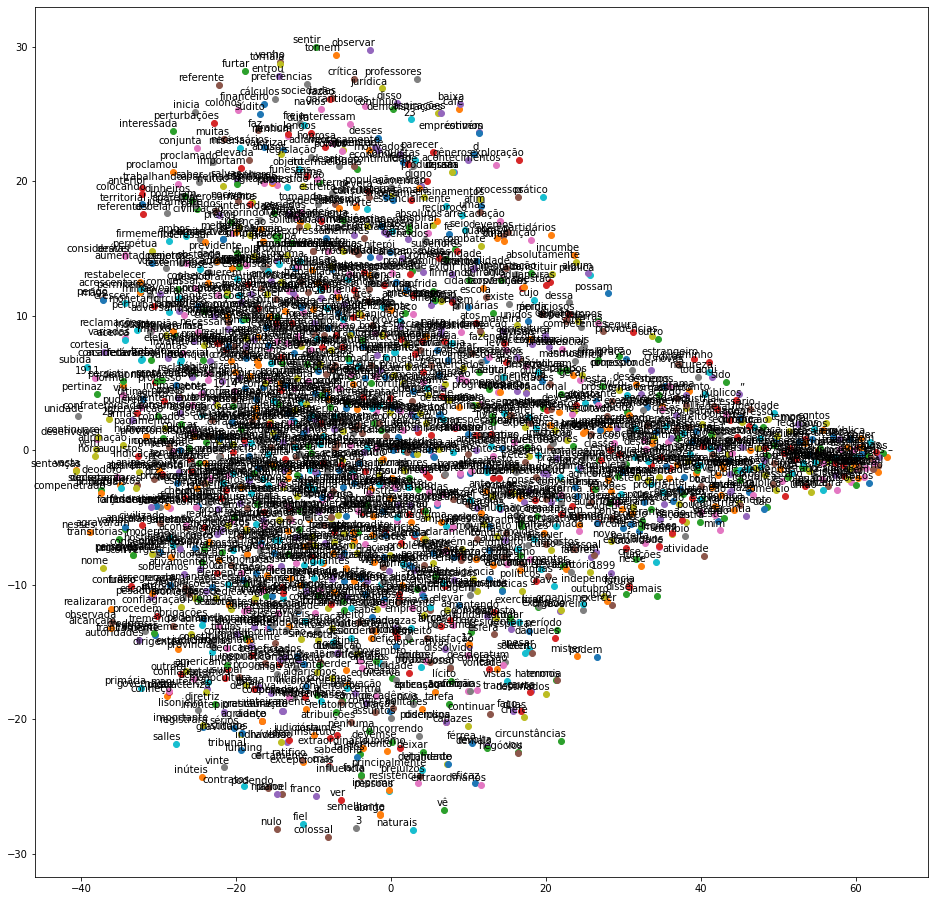

In [116]:
tsne_plot(model_primeira_republica)

<ipython-input-114-6af7c76e2364>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


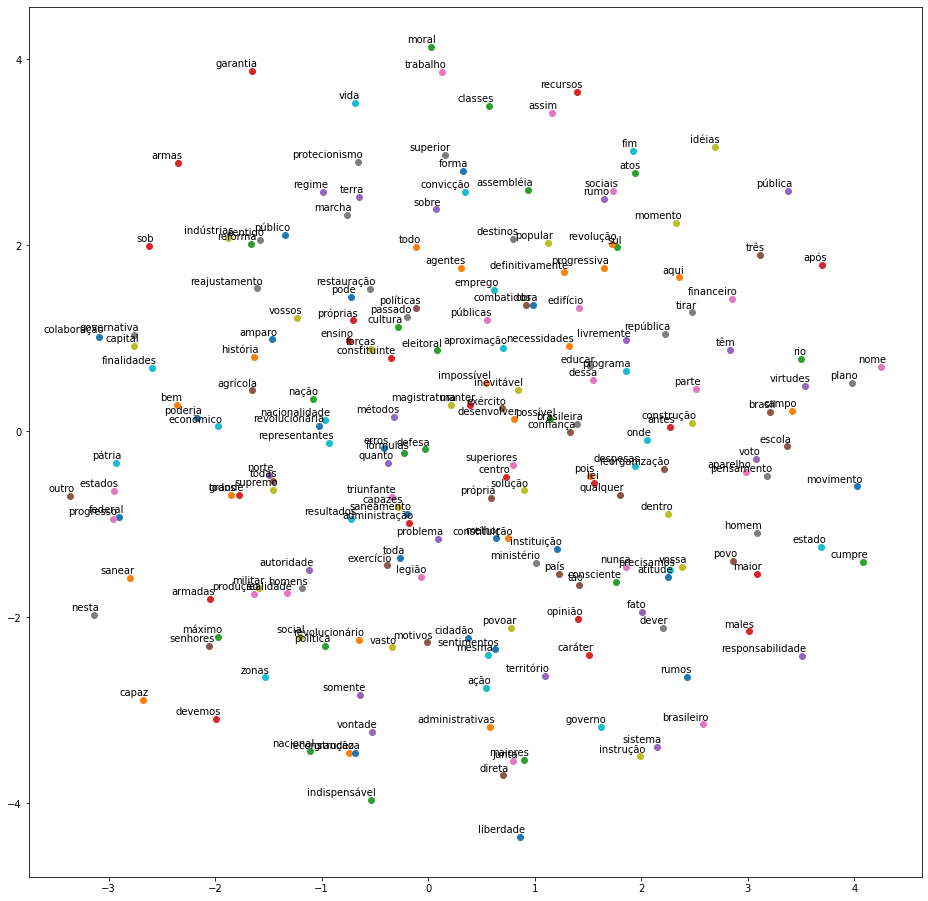

In [117]:
tsne_plot(model_gov_provisorio)

<ipython-input-114-6af7c76e2364>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


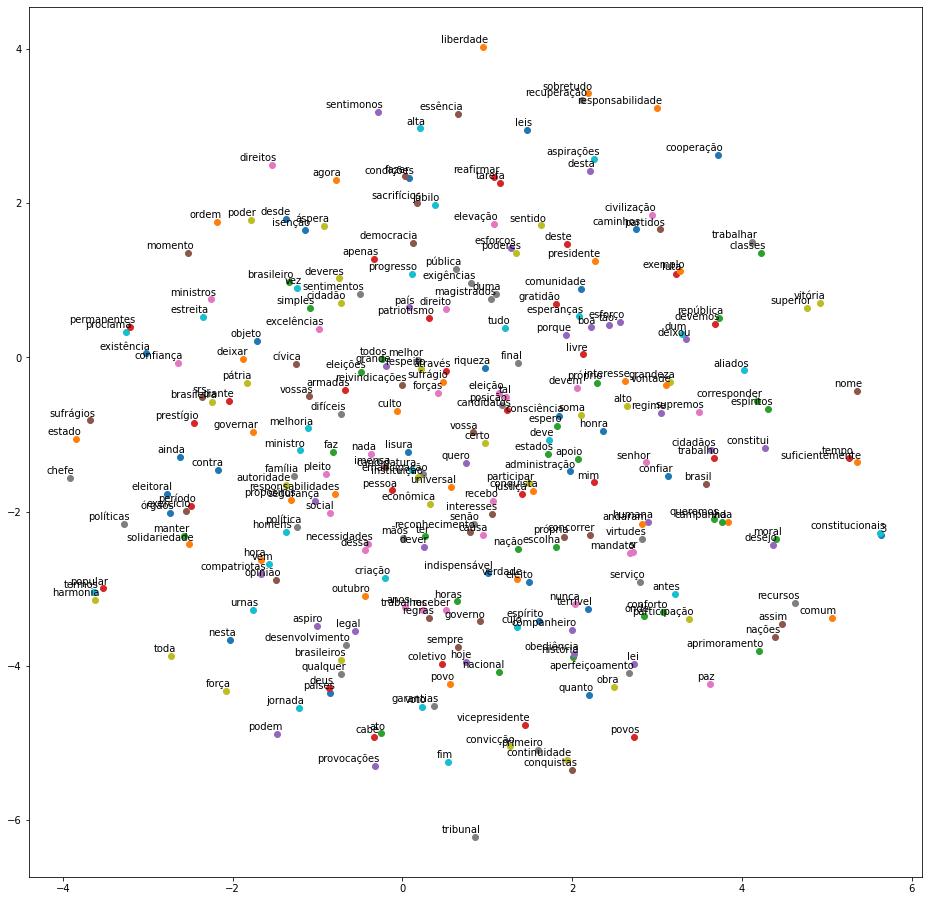

In [118]:
tsne_plot(model_quarta_republica)

<ipython-input-114-6af7c76e2364>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


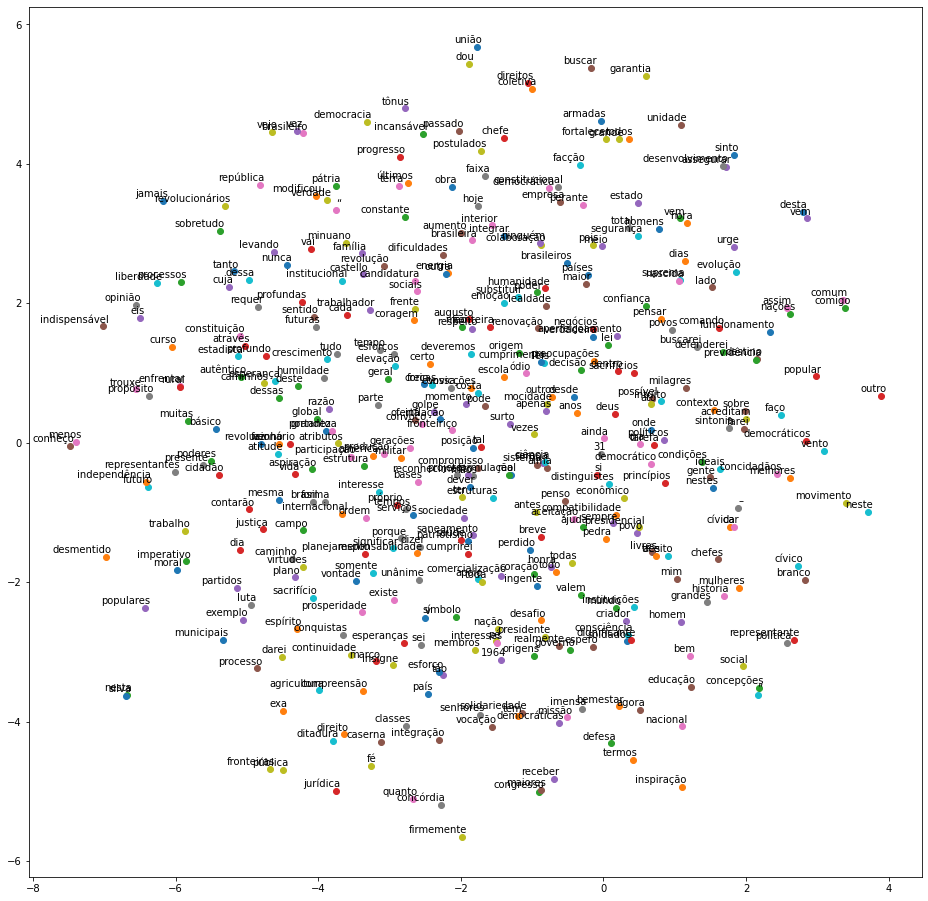

In [119]:
tsne_plot(model_ditadura)

<ipython-input-114-6af7c76e2364>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


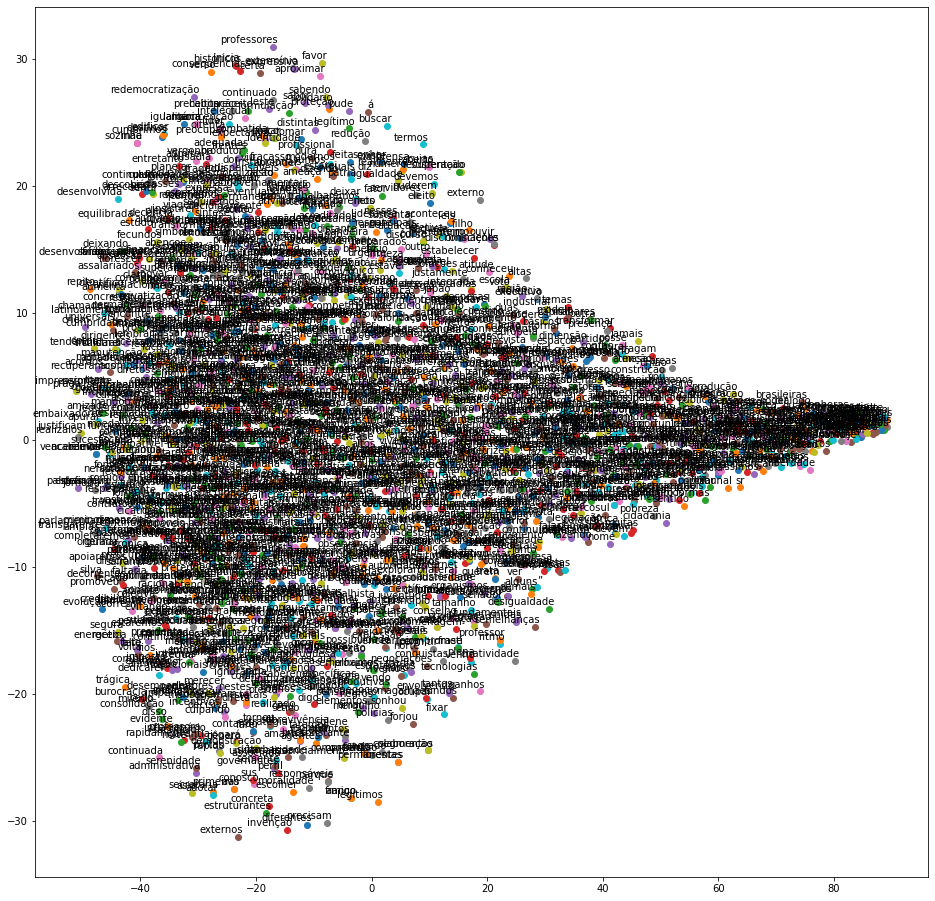

In [120]:
tsne_plot(model_nova_republica)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Corpora', primeira_republica, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

##### Tentativa do uso do BERTimbau

In [ ]:
from transformers import AutoTokenizer  # Or BertTokenizer
from transformers import AutoModelForPreTraining  # Or BertForPreTraining for loading pretraining heads
from transformers import AutoModel  # or BertModel, for BERT without pretraining heads

model = AutoModelForPreTraining.from_pretrained('neuralmind/bert-base-portuguese-cased')
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=False)

Downloading:   0%|          | 0.00/647 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForPreTraining were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['cls.predictions.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/210k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

In [ ]:
len(discursos_tokens[0])

542

In [ ]:
import torch

model = AutoModel.from_pretrained('neuralmind/bert-base-portuguese-cased')

In [ ]:
sents = sent_tokenize(discursos[0])
sents

['tendo assumido governo estado termos constituição convite generalíssimo manoel deodoro fonseca , espontaneamente resignou poder manhã 23 deste mês , cumpreme expor país pensamento geral ha inspirar administração publica .',
 'conhecidos fatos realizaram nesta cidade porto durante noite 22 manhã dia seguinte , precedidos levantamento heróico estado rio grande sul , atitude francamente hostil estado pará .',
 'armada , grande parte exercito cidadãos diversas classes promoveram armas restabelecimento constituição leis suspensas decreto 3 deste mês , dissolveu congresso nacional .',
 'historia registrará feito cívico classes armadas país prol lei , pode substituída força ; registrará igualmente ato abnegação patriotismo generalíssimo manoel deodoro fonseca resignando poder afim poupar luta irmãos , derramamento sangue brasileiros , choque companheiros armas , fatores gloriosos imortal movimento 15 novembro , destinados defender , unidos , honra nacional integridade pátria contra estrange

In [ ]:
interest = [isent for isent in sents if 'povo' in isent]
print(interest)

['acontecimentos têm muitos modelos anais humanidade quais podemos gloriar , justamente gloriamos duas revoluções pacificas operaram republica transformação todo direito político abolição elemento servil , transformação trabalho nacional atestarão vindouros amor povo , marinha exercito liberdades constitucionais , formam enobrecem vida nações modernas .', 'povos novos onerados dividas nunca povos felizes , nada aumenta dividas estados despesas proporção recursos econômicos nação , forças vivas trabalho , industrias comércio , produz desequilíbrio orçamentos , mal social , miséria .', 'confiança povo , exercito marinha espero desmerecer .', 'coragem constância mostraram combates transformaram anos paz , fruído , amor liberdade republica , povo fundaram querem manter consolidar .', 'povo sabe quer livre , deve igualmente respeitar ordem , primeira condição sociedades democráticas , freio ás paixões , governos absolutos tradições obediência pessoal , constituem , mim governo sacratíssimo 

In [ ]:
for sent in interest:
    print(sent)

acontecimentos têm muitos modelos anais humanidade quais podemos gloriar , justamente gloriamos duas revoluções pacificas operaram republica transformação todo direito político abolição elemento servil , transformação trabalho nacional atestarão vindouros amor povo , marinha exercito liberdades constitucionais , formam enobrecem vida nações modernas .
povos novos onerados dividas nunca povos felizes , nada aumenta dividas estados despesas proporção recursos econômicos nação , forças vivas trabalho , industrias comércio , produz desequilíbrio orçamentos , mal social , miséria .
confiança povo , exercito marinha espero desmerecer .
coragem constância mostraram combates transformaram anos paz , fruído , amor liberdade republica , povo fundaram querem manter consolidar .
povo sabe quer livre , deve igualmente respeitar ordem , primeira condição sociedades democráticas , freio ás paixões , governos absolutos tradições obediência pessoal , constituem , mim governo sacratíssimo empenho , sê-l

In [ ]:
str(interest[0])

'acontecimentos têm muitos modelos anais humanidade quais podemos gloriar , justamente gloriamos duas revoluções pacificas operaram republica transformação todo direito político abolição elemento servil , transformação trabalho nacional atestarão vindouros amor povo , marinha exercito liberdades constitucionais , formam enobrecem vida nações modernas .'

In [ ]:
for sent in interest:
    input_ids = tokenizer.encode(sent, return_tensors='pt')
    with torch.no_grad():
        outs = model(input_ids)
        encoded = outs[0][0, 1:-1]  # Ignore [CLS] and [SEP] special tokens
    print(encoded)

tensor([[ 0.1382, -0.0924,  0.2743,  ..., -0.0886, -0.0759, -0.2810],
        [ 0.3386, -0.2263,  0.6401,  ..., -0.2630,  0.1341, -0.5407],
        [-0.5776,  0.1636,  1.3117,  ..., -0.2977, -0.1889, -0.8109],
        ...,
        [ 0.2993, -0.2946,  0.0087,  ...,  0.0975,  0.3417, -0.4716],
        [-0.0067, -0.4541,  0.5618,  ..., -0.0121,  0.3842, -0.6098],
        [ 0.0303, -0.1190,  0.4043,  ...,  0.2334,  0.1623, -0.4894]])
tensor([[ 0.3197, -0.5472,  0.4379,  ...,  0.5934,  0.2348, -0.1020],
        [-0.2846, -0.0204,  0.7345,  ...,  0.8797, -0.0674, -0.1178],
        [ 0.4403, -0.1579,  0.1679,  ...,  0.0782,  0.2349, -0.7405],
        ...,
        [ 0.2716, -0.3138, -0.7212,  ...,  1.1490, -0.3450, -0.2678],
        [ 0.2144, -0.9088,  0.2022,  ...,  0.5179,  0.3865, -1.0297],
        [-0.1779, -0.3411,  0.4893,  ...,  0.0543,  0.0658, -0.2152]])
tensor([[ 0.0017, -0.0750,  0.8632,  ..., -0.3880, -0.4058, -0.3380],
        [ 0.3895, -0.1187,  0.2069,  ...,  0.0328, -0.3206, -0

##### Plots

In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [122]:
def tsnescatterplot(model, word, list_names):

    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    close_words = model.wv.most_similar([word])
    
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    reduc =  PCA(n_components=10).fit_transform(arrays)
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)
    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [119]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=1).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [126]:
tsnescatterplot(model, 'brasil', ['povo', 'brasil'])

KeyError: ignored